Import knihoven


In [117]:
from ultralytics import YOLO
import numpy as np
import cv2 
import cvzone
import time
import matplotlib.pyplot as plt


Import souboru se jmeny 

In [118]:
classesfile='coco.names'
classNames=[]
with open(classesfile,'rt') as f:
    classNames=f.read().rstrip('\n').split('\n')

Model

In [119]:
model = YOLO('yolov8m.pt')

Pokud chci hledat urcity objekt zjisti jeho id

In [120]:
searched_object = 'teddy bear'
object_id = classNames.index(searched_object)# zjisti class id objektu co hledam
print(object_id)

77


nacte a zobrazy zvoleny obrazek

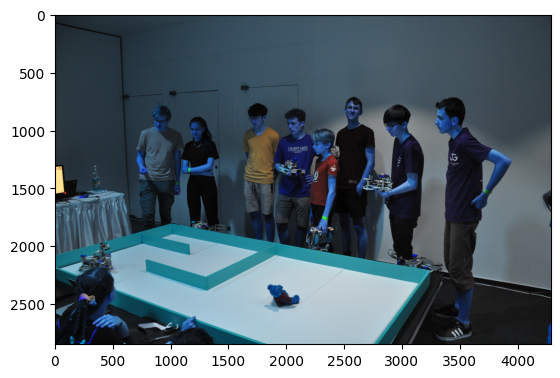

In [121]:
img = cv2.imread('obr2.jpg')
#cv2.imshow('picture',img)
#cv2.waitKey(2)
plt.imshow(img)

pouziti modelu na nalezeni objektu

In [122]:
results = model(img)



0: 448x640 11 persons, 3 skateboards, 1 bottle, 1 dining table, 1 tv, 1 laptop, 1 teddy bear, 429.9ms
Speed: 0.0ms preprocess, 429.9ms inference, 0.0ms postprocess per image at shape (1, 3, 448, 640)


vykresleni jednotlivych objektu na obrazek

In [123]:
id0 = -1
id1 = -1
id2 = -1
id3 = -1
id4 = -1
id5 = -1
id6 = -1
id7 = -1
id8 = -1
id9 = -1
id10 = -1
id11 = -1
id12 = -1
id13 = -1
id14 = -1
id15 = -1
id16 = -1
id17 = -1
id18 = -1
id19 = -1
id20 = -1

n=0
for r in results:
        boxes = r.boxes
        #cv2.line(img,(int(vid_width/2),0),(int(vid_width/2),vid_height),(255,0,255),thickness=2 )#vykresli na video primku stredem videa 
        for box in boxes:
            cls = int(box.cls[0])#zjisti classu objektu
            x1,y1,x2,y2 = box.xyxy [0] #x1 je pozice leveho horniho rohu objektu v ose x, x2 je velikost objektu v ose x v px 
            x1,y1,x2,y2 = int(x1),int(y1),int(x2),int(y2)#prevedeni hodnot na int pro lepsi praci s nima 
            print('X=',x1,'Y=',y1,'W=',x2,'H=',y2)#vypisuje velikost objektu a jeho polohu v px 
            cv2.rectangle(img,(x1,y1),(x2,y2),(255,0,255),3)#nakresli box okolo detekovane veci 
                #model confidence
            conf = box.conf[0]#jistota modelu 
            conf = float(conf*100)
            rounded_conf = int(conf)#zaokrouhli jistotu modelu na dve desetina mista 
            print('confidence:',rounded_conf)
                #claasnames
            cls = int(box.cls[0])#ulozi classu daneho objektu do promenne 
            print(classNames[cls])#vypise klassu objektu
            if n==0:
                id0=cls
            if n==1:
                id1=cls
            if n==2:
                id2=cls
            if n==3:
                id3=cls
            if n==4:
                id4=cls
            if n==5:
                id5=cls
            if n==6:
                id6=cls
            if n==7:
                id7=cls
            if n==8:
                id8=cls
            if n==9:
                id9=cls
            if n==10:
                id10=cls
            if n==11:
                id11=cls
            if n==12:
                id12=cls
            if n==13:
                id13=cls
            if n==14:
                id14=cls
            if n==15:
                id15=cls
            if n==16:
                id16=cls
            if n==17:
                id17=cls
            if n==18:
                id18=cls
            if n==19:
                id19=cls
            if n==20:
                id20=cls
                #object center 
            center_x,center_y = x1+(x2/2),y1+(y2/2)#vypocet stredu objektu pro lepsi lokalizaci medveda 
            center_x,center_y = int(center_x-x1/2), int(center_y-y1/2)#prevede hodnoty na int aby se dali pouzit ve funkci ukazujici stred 
            print('center:',center_x,center_y)#vypise udaje 
            cv2.circle(img, (center_x,center_y),10, (255,0,255), thickness=-1)
                #box on bounding box s nazvem claasy a confidence modelu 
            cvzone.putTextRect(img, f'{classNames[cls]}{rounded_conf}',(max(0,x1), max(35,y1)))#vykresli nazev classy objektu spolecne s confidence do videa 
            n=n+1   
            #print(n)#optional 
                #vypocet odchylky objektu 
            #object_deviation =0
            #center_line = int(vid_width/2)# x souradnice primky zobrazujici stred 
            #death_zone = 50#ukazuje jak velke rozpeti v px se pocita jako stred 
            #if (center_x > (center_line - death_zone)) and (center_x < (center_line + death_zone)): #pokud je objekt +-50px ve stredu je to brano jako ze je rovne 
             #   object_deviation = 0#odchylka objektu od stredu obrazovky
              #  print('deviation = ',object_deviation)
            #if (center_x < (center_line - death_zone)) and (center_x > (center_line + death_zone)): #pokud je objekt +-50px od stredu zacne se pocitat odchylka -doprava +doleva 
               # object_deviation = center_line-center_x #odchylka objektu od stredu obrazovky
                #print('deviation = ',object_deviation) 
                #prevod odchylky do stupnu 
            #deviation_deg = float(object_deviation/100)
            #print(deviation_deg,"degrees")
            #if (cls > object_id) and (cls < object_id):
             #   print('vrong object')
            #else:
               # print("no objects found turn robot")


X= 3250 Y= 712 W= 3945 H= 2817
confidence: 92
person
center: 3597 1764
X= 696 Y= 781 W= 1111 H= 1872
confidence: 91
person
center: 903 1326
X= 1078 Y= 883 W= 1421 H= 1836
confidence: 90
person
center: 1249 1359
X= 2403 Y= 708 W= 2766 H= 2113
confidence: 89
person
center: 2584 1410
X= 1615 Y= 768 W= 1937 H= 1976
confidence: 88
person
center: 1776 1372
X= 1876 Y= 808 W= 2242 H= 2013
confidence: 88
person
center: 2059 1410
X= 2759 Y= 778 W= 3185 H= 2168
confidence: 87
person
center: 2972 1473
X= 2178 Y= 984 W= 2453 H= 2047
confidence: 80
person
center: 2315 1515
X= 5 Y= 2177 W= 674 H= 2837
confidence: 78
person
center: 339 2507
X= 319 Y= 1305 W= 392 H= 1533
confidence: 75
bottle
center: 355 1419
X= 0 Y= 1303 W= 111 H= 1612
confidence: 63
laptop
center: 55 1457
X= 2863 Y= 2026 W= 3341 H= 2224
confidence: 59
skateboard
center: 3102 2125
X= 1 Y= 1479 W= 674 H= 2077
confidence: 58
diningtable
center: 337 1778
X= 1830 Y= 2331 W= 2112 H= 2528
confidence: 53
teddy bear
center: 1971 2429
X= 955 Y

vypise id nalezenych objektu 

In [127]:
if id0 > -1:
    print(id0)
if id1 > -1:
    print(id1)
if id2 > -1:
    print(id2)
if id3 > -1:
    print(id3)
if id4 > -1:
    print(id4)
if id5 > -1:
    print(id5)
if id6 > -1:
    print(id6)
if id7 > -1:    
    print(id7)
if id8 > -1:
    print(id8)
if id9 > -1:
    print(id9)
if id10 > -1:    
    print(id10)
if id11 > -1:    
    print(id11)
if id12 > -1:
    print(id12)
if id13 > -1:
    print(id13)
if id14 > -1:
    print(id14)
if id15 > -1:
    print(id15)
if id16 > -1:
    print(id16)
if id17 > -1:    
    print(id17)
if id18 > -1:
    print(id18)
if id19 > -1:
    print(id19)
if id20 > -1:
    print(id20)


0
0
0
0
0
0
0
0
0
39
63
36
60
77
0
0
36
62
36


hledani urciteho objektu

In [130]:
if id0==object_id or id1==object_id or id2==object_id or id3==object_id or id4==object_id or id5==object_id or id6==object_id or id7==object_id or id8==object_id or id9==object_id or id10==object_id or id11==object_id or id12==object_id or id13==object_id or id14==object_id or id15==object_id or id16==object_id or id17==object_id or id18==object_id or id19==object_id or id20==object_id:
    print('object found')

object found


ukaze obrazek

tensor([[3.2505e+03, 7.1270e+02, 3.9454e+03, 2.8176e+03, 9.2105e-01, 0.0000e+00],
        [6.9635e+02, 7.8176e+02, 1.1116e+03, 1.8725e+03, 9.1639e-01, 0.0000e+00],
        [1.0783e+03, 8.8312e+02, 1.4219e+03, 1.8366e+03, 9.0279e-01, 0.0000e+00],
        [2.4032e+03, 7.0867e+02, 2.7670e+03, 2.1135e+03, 8.9826e-01, 0.0000e+00],
        [1.6158e+03, 7.6880e+02, 1.9371e+03, 1.9767e+03, 8.8718e-01, 0.0000e+00],
        [1.8766e+03, 8.0832e+02, 2.2420e+03, 2.0139e+03, 8.8630e-01, 0.0000e+00],
        [2.7597e+03, 7.7842e+02, 3.1856e+03, 2.1683e+03, 8.7502e-01, 0.0000e+00],
        [2.1783e+03, 9.8459e+02, 2.4535e+03, 2.0472e+03, 8.0971e-01, 0.0000e+00],
        [5.6058e+00, 2.1780e+03, 6.7423e+02, 2.8375e+03, 7.8457e-01, 0.0000e+00],
        [3.1946e+02, 1.3055e+03, 3.9243e+02, 1.5331e+03, 7.5618e-01, 3.9000e+01],
        [1.4026e-01, 1.3040e+03, 1.1189e+02, 1.6125e+03, 6.3528e-01, 6.3000e+01],
        [2.8638e+03, 2.0265e+03, 3.3415e+03, 2.2246e+03, 5.9332e-01, 3.6000e+01],
        [1.1209e

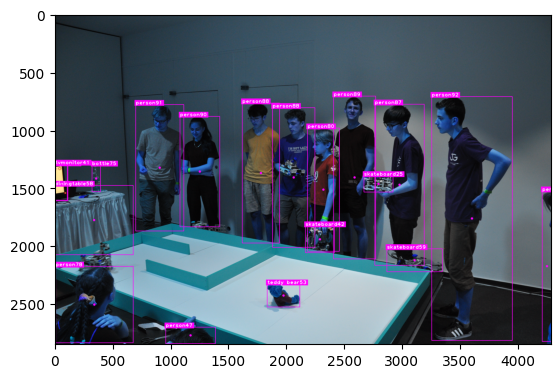

In [131]:
plt.imshow(img)
print(boxes.data)
